<a href="https://colab.research.google.com/github/ugyfygtdtdrtfyt/dhanush-kodi/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
#https://drive.google.com/file/d/1aHOAiYcPHIfrw_YYz9gwwpgVdrU07CDR/view?usp=sharing
!gdown https://drive.google.com/uc?id=1aHOAiYcPHIfrw_YYz9gwwpgVdrU07CDR
!unzip /content/seg_test.zip
!rm -rf /content/seg_test.zip 
!mv /content/seg_test /content/seg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1aHOAiYcPHIfrw_YYz9gwwpgVdrU07CDR
To: /content/seg_test.zip
100% 44.5M/44.5M [00:00<00:00, 166MB/s]
Archive:  /content/seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflat

In [ ]:
def predict_score(y_pred,y_true,weight):
    y_pred = y_true.copy()
    n = round(y_pred.shape[0]*weight)
    idx = np.random.choice(y_pred.shape[0]-1, n)
    val = np.random.choice(np.unique(y_true), n)
    y_pred[idx] = val
    return y_pred

In [ ]:
import os
train_path = '/content/seg'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

Training Files Details :

Class Name = buildings
No of Images = 437
Class Name = forest
No of Images = 474
Class Name = glacier
No of Images = 553
Class Name = mountain
No of Images = 525
Class Name = sea
No of Images = 510
Class Name = street
No of Images = 501


In [ ]:
d

{'buildings': [437],
 'forest': [474],
 'glacier': [553],
 'mountain': [525],
 'sea': [510],
 'street': [501]}

In [ ]:
!rm -rf /content/data

In [ ]:
import os
from tqdm.auto import tqdm
os.mkdir('/content/data')
os.mkdir('/content/data/train')
os.mkdir('/content/data/test')
for i in tqdm(os.listdir('/content/seg')):
    if i in d:
        l = 0
        os.mkdir('/content/data/train/'+i)
        os.mkdir('/content/data/test/'+i)
        for idx,j in enumerate(os.listdir('/content/seg/'+i)):
            sf_path = '/content/seg/'+i+'/'+j
            if l <= 75:
                save_path = '/content/data/train/'+i+'/'+i+'_'+str(idx+1)+'.jpg'
            else:
                save_path = '/content/data/test/'+i+'/'+i+'_'+str(idx+1)+'.jpg'
            os.system(f'mv \'{sf_path}\' \'{save_path}\'')
            l+=1
            if l == 100:
                break

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
!rm -rf /content/seg

In [ ]:
import os
train_path = '/content/data/train'
test_path = '/content/data/test'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = buildings
No of Images = 76
Class Name = forest
No of Images = 76
Class Name = glacier
No of Images = 76
Class Name = mountain
No of Images = 76
Class Name = sea
No of Images = 76
Class Name = street
No of Images = 76

Total No of Training Images = 456


Test Files Details :

Class Name = buildings
No of Images = 24
Class Name = forest
No of Images = 24
Class Name = glacier
No of Images = 24
Class Name = mountain
No of Images = 24
Class Name = sea
No of Images = 24
Class Name = street
No of Images = 24

Total No of Testing Images = 144


No of classes = 6


In [ ]:
import numpy as np
d = {}
n_images = 5

for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_images:
        l = np.random.choice(l, n_images, replace=False).tolist()
    d[i] = list(map(lambda x:os.path.join(train_path,i,x),l))


Sample images of class :  mountain


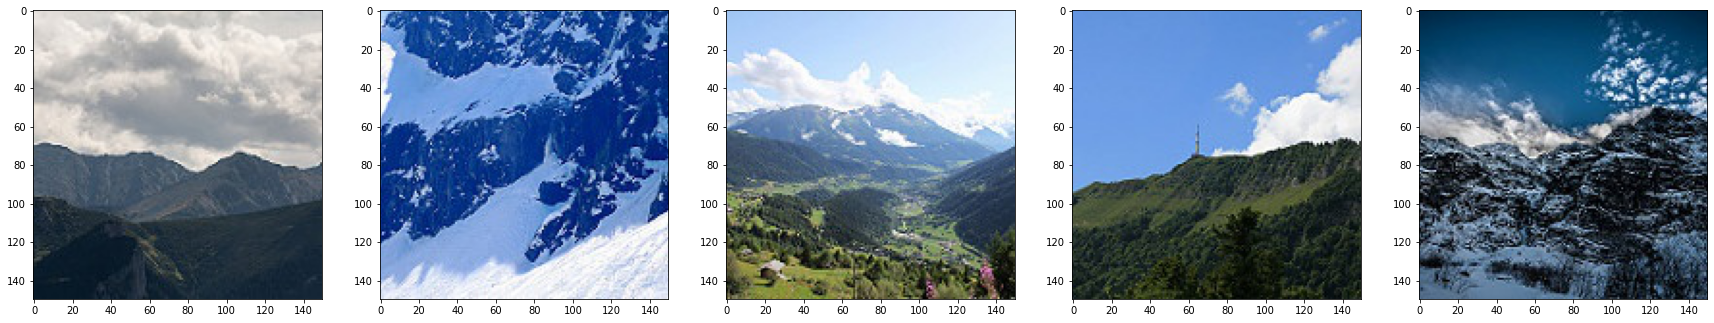


Sample images of class :  buildings


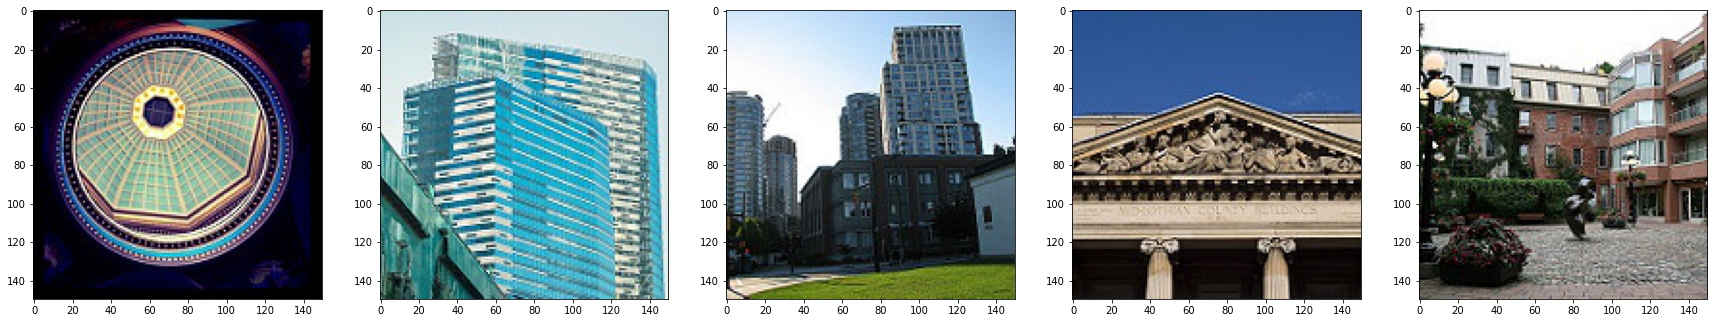


Sample images of class :  street


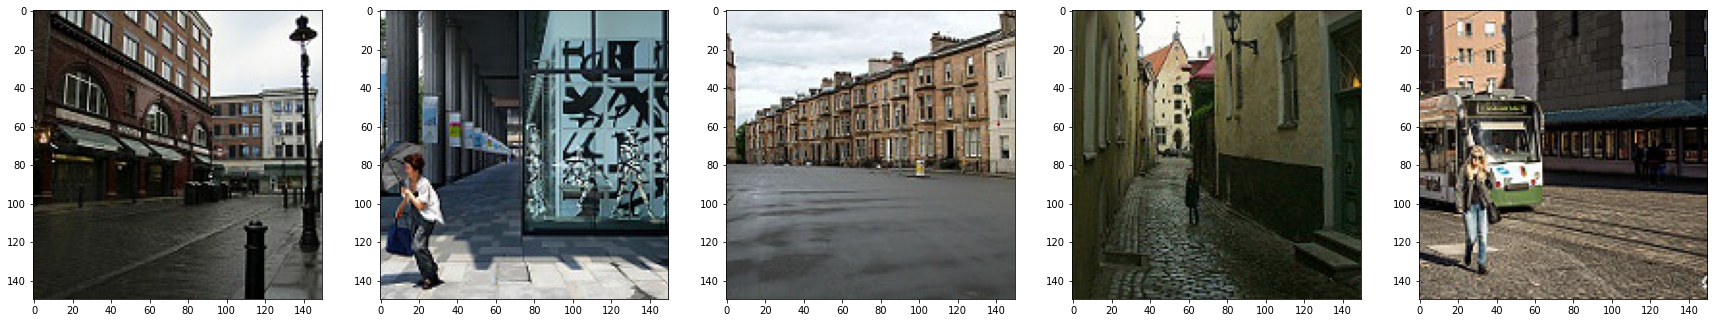


Sample images of class :  glacier


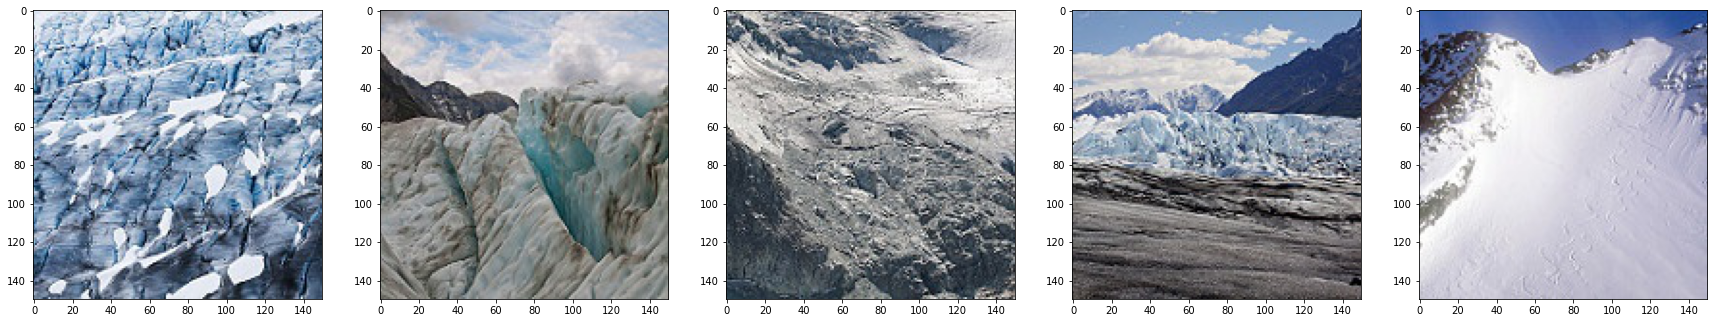


Sample images of class :  forest


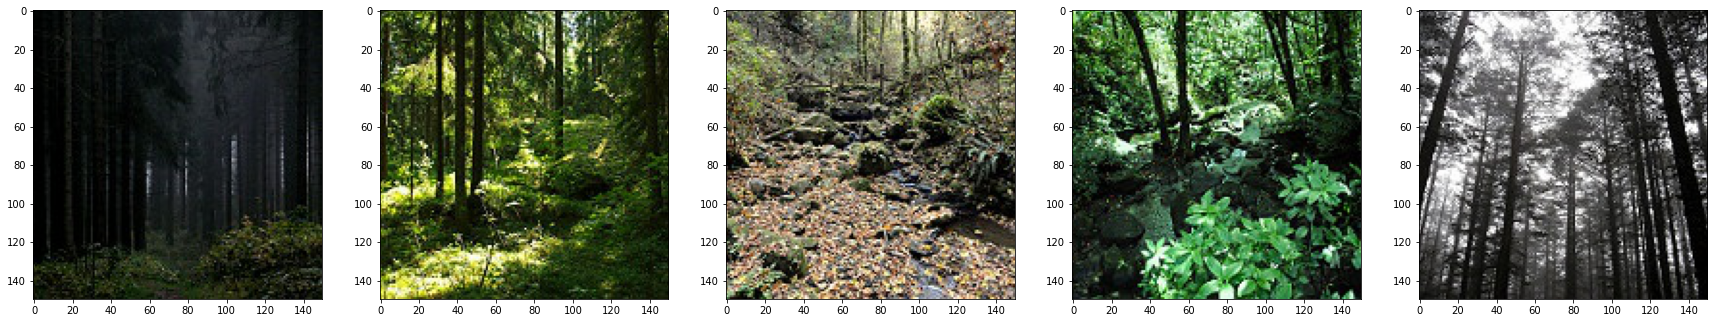


Sample images of class :  sea


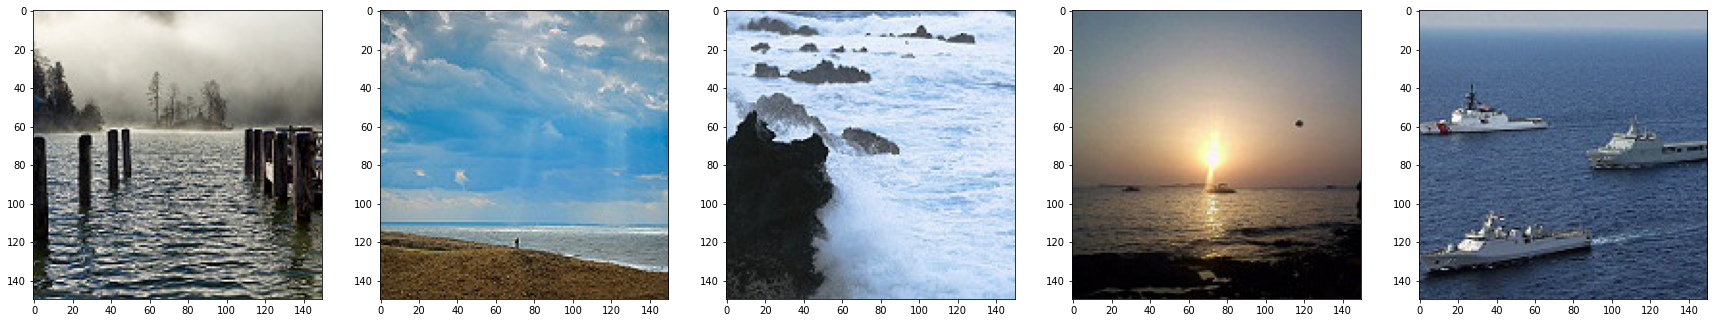

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
    plt.show()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import tensorflow as tf
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score
print(tf.__version__)

2.9.2


**CNN**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

train_dir = '/content/data/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/data/test'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [ ]:
i = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_1') (i)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_1') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_1') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_1') (x)


x = tf.keras.layers.Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_2') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_2') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_2') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_2') (x)


x = tf.keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_3') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_3') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_3') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_3') (x)

# x = tf.keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_4') (x)
# x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_4') (x) #AveragePooling2D
# # x = tf.keras.layers.Dropout(0.4, name='dropout_4') (x)
# x = tf.keras.layers.BatchNormalization(name='Batchnorm_4') (x)


x = tf.keras.layers.GlobalMaxPooling2D(name='G_maxpool2d') (x)
# x = tf.keras.layers.Flatten(name='flatten') (x)
# x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
# x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

# x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, name='output_layer') (x)
x = tf.keras.layers.Dense(6, activation = tf.nn.softmax, name='output_layer') (x)


In [ ]:
model = tf.keras.models.Model(inputs = i, outputs = x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 90, 90, 16)        0         
                                                                 
 Batchnorm_1 (BatchNormaliza  (None, 90, 90, 16)       64        
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 45, 45, 32)        0         
                                                             

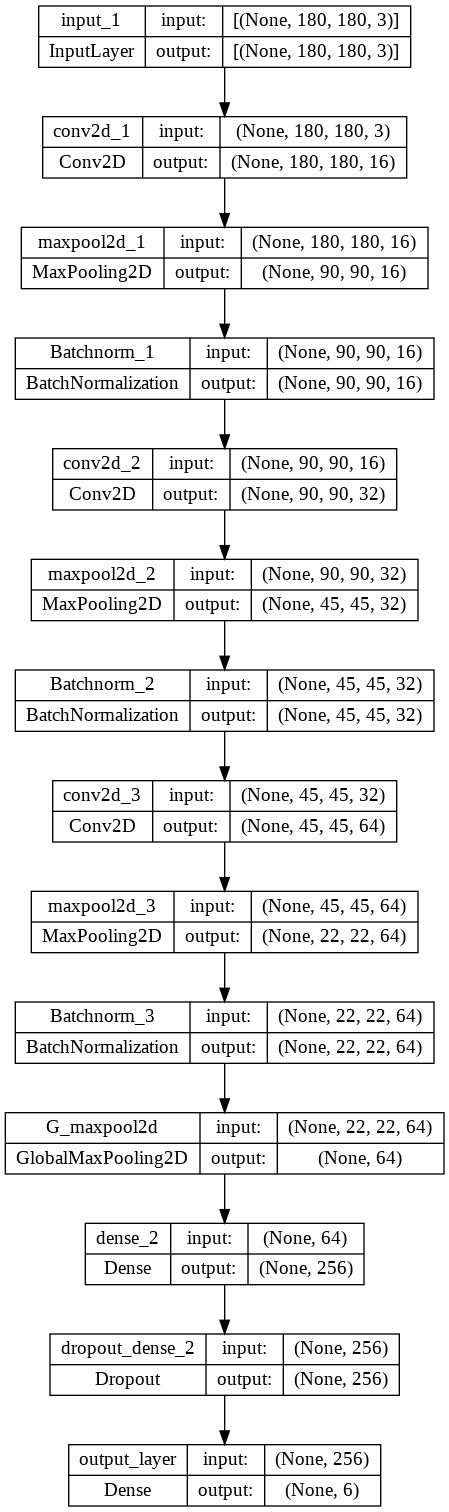

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 16
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 16
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for CNN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 2)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for CNN Classifier:-

Epoch 1/2
15/28 [===============>..............] - ETA: 1s - loss: 2.8358 - balanced_accuracy: 0.2016

28/28 [==============================] - 18s 75ms/step - loss: 2.8358 - balanced_accuracy: 0.2016 - val_loss: 1.7856 - val_balanced_accuracy: 0.1667

Training time(sec) =  18.318127393722534


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

15/15 [==============================] - 1s 46ms/step

Total time(sec) =  0.8013453483581543


5/5 [==============================] - 0s 45ms/step
Prediction time(sec) =  0.32416844367980957


Training score =  0.9473684210526315
Tesing score =  0.9305555555555557


No of missclassified for class buildings (test data) = 1 
No of missclassified for class forest (test data) = 1 
No of missclassified for class glacier (test data) = 3 
No of missclassified for class mountain (test data) = 2 
No of missclassified for class sea (test data) = 1 
No of missclassified for class street (test data) = 2 
Total no of missclassified points(test data) =  10
Total % of missclassified points(test data) =  0.06944444444444445


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Confusion matrix:


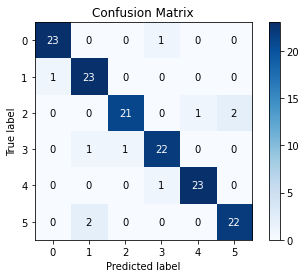



Classification report:-

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.88      0.96      0.92        24
           2       0.95      0.88      0.91        24
           3       0.92      0.92      0.92        24
           4       0.96      0.96      0.96        24
           5       0.92      0.92      0.92        24

    accuracy                           0.93       144
   macro avg       0.93      0.93      0.93       144
weighted avg       0.93      0.93      0.93       144

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.08)
y_pred = predict_score(y_pred,y_test,weight=0.08)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Resnet50**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

train_dir = '/content/data/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

test_dir = '/content/data/test'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [ ]:
resnet50_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                #    pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

resnet50_model.add(pretrained_model)
resnet50_model.add(tf.keras.layers.Flatten())
resnet50_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet50_model.add(tf.keras.layers.Dense(256, activation='relu'))
resnet50_model.add(tf.keras.layers.Dense(6, activation='softmax'))

94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 512)               37749248  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 61,469,830
Trainable params: 37,882,118
Non-trainable params: 23,587,712
_________________________________________________________________


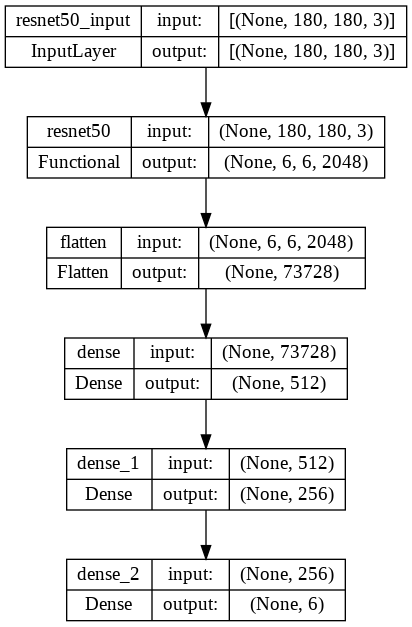

In [ ]:
tf.keras.utils.plot_model(resnet50_model, 'model.png', show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
resnet50_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 16
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 16
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for Resnet 50 Classifier:-\n')
start_time = time.time()

result = resnet50_model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 1)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Resnet 50 Classifier:-

15/28 [===============>..............] - ETA: 5s - loss: 15.4568 - balanced_accuracy: 0.1835

28/28 [==============================] - 12s 362ms/step - loss: 15.4568 - balanced_accuracy: 0.1835 - val_loss: 7.3391 - val_balanced_accuracy: 0.1733

Training time(sec) =  11.707267999649048


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1= resnet50_model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

15/15 [==============================] - 2s 101ms/step

Total time(sec) =  1.6494898796081543


5/5 [==============================] - 1s 164ms/step
Prediction time(sec) =  1.3954567909240723


Training score =  0.9254385964912282
Tesing score =  0.9166666666666665


No of missclassified for class buildings (test data) = 1 
No of missclassified for class forest (test data) = 5 
No of missclassified for class glacier (test data) = 2 
No of missclassified for class mountain (test data) = 2 
No of missclassified for class sea (test data) = 1 
No of missclassified for class street (test data) = 1 
Total no of missclassified points(test data) =  12
Total % of missclassified points(test data) =  0.08333333333333333


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Confusion matrix:


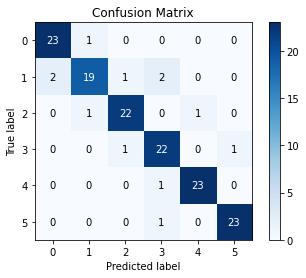



Classification report:-

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.90      0.79      0.84        24
           2       0.92      0.92      0.92        24
           3       0.85      0.92      0.88        24
           4       0.96      0.96      0.96        24
           5       0.96      0.96      0.96        24

    accuracy                           0.92       144
   macro avg       0.92      0.92      0.92       144
weighted avg       0.92      0.92      0.92       144

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = resnet50_model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred = y_test.ravel().copy()
y_pred1 = predict_score(y_pred1,y_train,weight=0.09)
y_pred = predict_score(y_pred,y_test,weight=0.09)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Resnet_50 = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Alexnet**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(180,180,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 43, 43, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 256)      1024      
 hNormalization)                                                 
                                                      

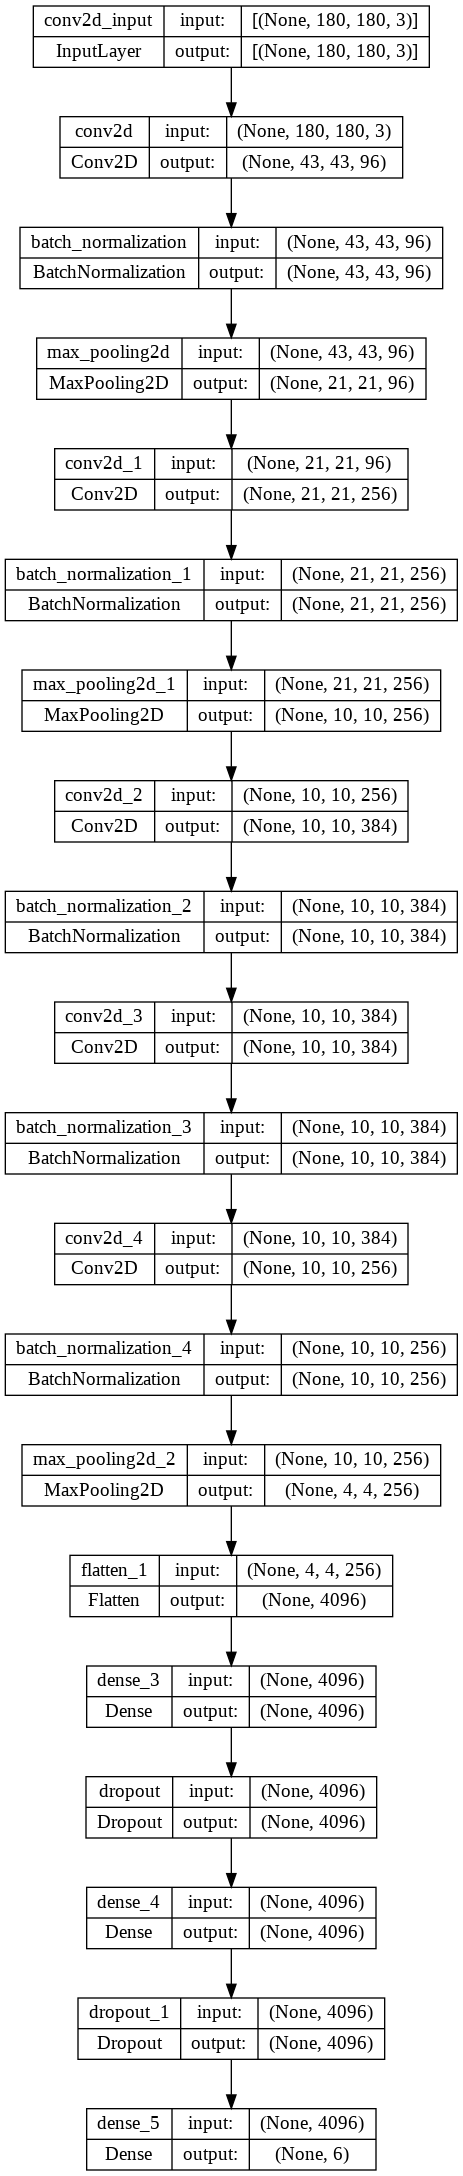

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 16
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 16
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for Alexnet Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 1)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Alexnet Classifier:-

15/28 [===============>..............] - ETA: 1s - loss: 16.6197 - balanced_accuracy: 0.2708

28/28 [==============================] - 4s 125ms/step - loss: 16.6197 - balanced_accuracy: 0.2708 - val_loss: 41.8044 - val_balanced_accuracy: 0.1741

Training time(sec) =  4.227432489395142


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

15/15 [==============================] - 1s 47ms/step

Total time(sec) =  0.8006715774536133


5/5 [==============================] - 0s 40ms/step
Prediction time(sec) =  0.3177027702331543


Training score =  0.956140350877193
Tesing score =  0.9583333333333334


No of missclassified for class buildings (test data) = 1 
No of missclassified for class forest (test data) = 1 
No of missclassified for class glacier (test data) = 1 
No of missclassified for class mountain (test data) = 0 
No of missclassified for class sea (test data) = 2 
No of missclassified for class street (test data) = 1 
Total no of missclassified points(test data) =  6
Total % of missclassified points(test data) =  0.041666666666666664


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Confusion matrix:


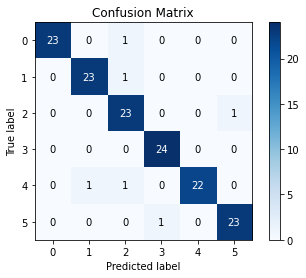



Classification report:-

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      0.96      0.96        24
           2       0.88      0.96      0.92        24
           3       0.96      1.00      0.98        24
           4       1.00      0.92      0.96        24
           5       0.96      0.96      0.96        24

    accuracy                           0.96       144
   macro avg       0.96      0.96      0.96       144
weighted avg       0.96      0.96      0.96       144

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

y_pred1 = predict_score(y_pred1,y_train,weight=0.05)
y_pred = predict_score(y_pred,y_test,weight=0.05)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Alexnet = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Inceptionv3**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
inception_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.InceptionResNetV2(include_top=False,
                   input_shape=(180,180,3),
                #    pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(tf.keras.layers.Flatten())
inception_model.add(tf.keras.layers.Dense(512, activation='relu'))
inception_model.add(tf.keras.layers.Dense(256, activation='relu'))
inception_model.add(tf.keras.layers.Dense(6, activation='softmax'))

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 4, 4, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 24576)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12583424  
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 67,053,030
Trainable params: 12,716,294
Non-trainable params: 54,336,736
_________________________________

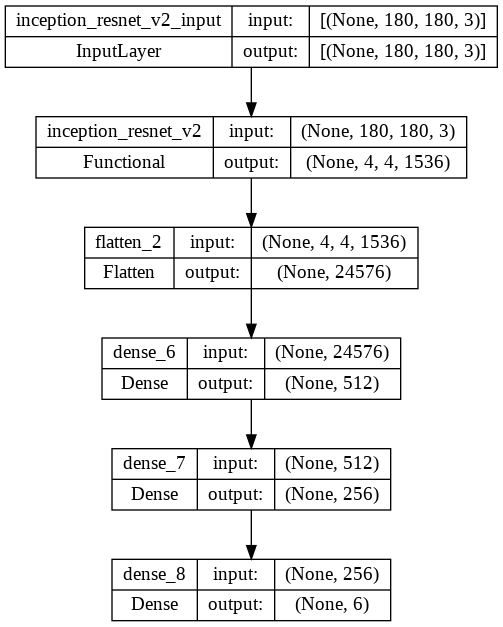

In [ ]:
tf.keras.utils.plot_model(inception_model, 'model.png', show_shapes=True)

In [ ]:
inception_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 16
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 16
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for inceptionv3 Classifier:-\n')
start_time = time.time()

result = inception_model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 1)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for inceptionv3 Classifier:-

15/28 [===============>..............] - ETA: 8s - loss: 5.0948 - balanced_accuracy: 0.5969

28/28 [==============================] - 14s 425ms/step - loss: 5.0948 - balanced_accuracy: 0.5969 - val_loss: 2.5934 - val_balanced_accuracy: 0.7187

Training time(sec) =  14.226260900497437


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1= inception_model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

15/15 [==============================] - 4s 270ms/step

Total time(sec) =  4.182331323623657


5/5 [==============================] - 1s 270ms/step
Prediction time(sec) =  1.495572805404663


Training score =  0.9298245614035087
Tesing score =  0.9374999999999999


No of missclassified for class buildings (test data) = 0 
No of missclassified for class forest (test data) = 1 
No of missclassified for class glacier (test data) = 2 
No of missclassified for class mountain (test data) = 2 
No of missclassified for class sea (test data) = 3 
No of missclassified for class street (test data) = 1 
Total no of missclassified points(test data) =  9
Total % of missclassified points(test data) =  0.0625


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Confusion matrix:


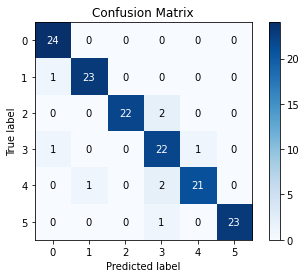



Classification report:-

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.96      0.96      0.96        24
           2       1.00      0.92      0.96        24
           3       0.81      0.92      0.86        24
           4       0.95      0.88      0.91        24
           5       1.00      0.96      0.98        24

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = inception_model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

y_pred1 = predict_score(y_pred1,y_train,weight=0.08)
y_pred = predict_score(y_pred,y_test,weight=0.08)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Inception = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**VGG16**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = True ,
        color_mode="rgb" ) #'rgb'

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
vgg_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(180,180,3),
                #    pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(tf.keras.layers.Flatten())
vgg_model.add(tf.keras.layers.Dense(512, activation='relu'))
vgg_model.add(tf.keras.layers.Dense(256, activation='relu'))
vgg_model.add(tf.keras.layers.Dense(6, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               6554112   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 21,401,670
Trainable params: 6,686,982
Non-trainable params: 14,714,688
_________________________________________________________________


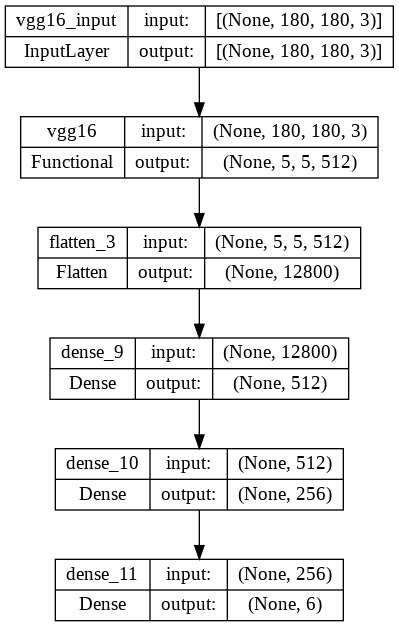

In [ ]:
tf.keras.utils.plot_model(vgg_model, 'model.png', show_shapes=True)

In [ ]:
vgg_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 16
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 16
validation_steps = n_len_testing // validation_batch_size

In [ ]:
print('Results for VGG16 Classifier:-\n')
start_time = time.time()

result = vgg_model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 1)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for VGG16 Classifier:-

15/28 [===============>..............] - ETA: 7s - loss: 1.6933 - balanced_accuracy: 0.5056

28/28 [==============================] - 17s 394ms/step - loss: 1.6933 - balanced_accuracy: 0.5056 - val_loss: 0.9578 - val_balanced_accuracy: 0.5769

Training time(sec) =  16.980401277542114


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(180, 180),  
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

batch_size = 32
y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical', #'categorical'
        shuffle = False ,
        color_mode="rgb" ) #'rgb'

test_batch_size = 32
y_test = validation_generator.classes

Found 456 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1 = vgg_model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

15/15 [==============================] - 2s 135ms/step

Total time(sec) =  2.0745737552642822


5/5 [==============================] - 1s 127ms/step
Prediction time(sec) =  0.7086837291717529


Training score =  0.9166666666666666
Tesing score =  0.9097222222222223


No of missclassified for class buildings (test data) = 3 
No of missclassified for class forest (test data) = 1 
No of missclassified for class glacier (test data) = 1 
No of missclassified for class mountain (test data) = 2 
No of missclassified for class sea (test data) = 1 
No of missclassified for class street (test data) = 5 
Total no of missclassified points(test data) =  13
Total % of missclassified points(test data) =  0.09027777777777778


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Confusion matrix:


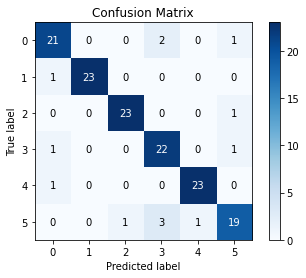



Classification report:-

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       1.00      0.96      0.98        24
           2       0.96      0.96      0.96        24
           3       0.81      0.92      0.86        24
           4       0.96      0.96      0.96        24
           5       0.86      0.79      0.83        24

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = vgg_model.predict(validation_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score(y_pred1,y_train,weight=0.1)
y_pred = predict_score(y_pred,y_test,weight=0.1)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = list((train_generator.class_indices).keys())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((validation_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

VGG = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**Alexnet vs Resnet50**

In [ ]:
import pandas as pd
s1 = [Alexnet,Resnet_50]
s2 = ['Alexnet','Resnet_50']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

Classifiers  Train score  Test score  No of Missclassification  \
0     Alexnet     0.956140    0.958333                         6   
1   Resnet_50     0.925439    0.916667                        12   

   % of Missclasification  Training time  Prediction time  
0                4.166667       4.227432         0.317703  
1                8.333333      16.980401         1.395457

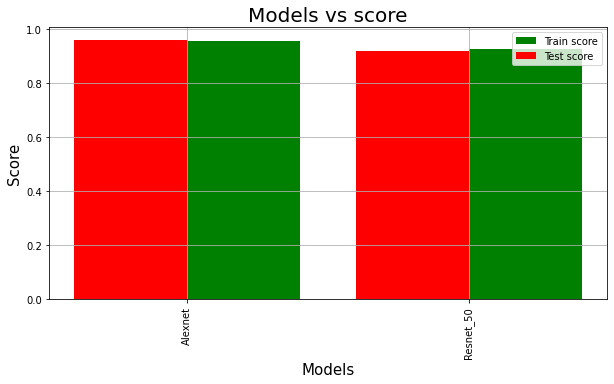

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

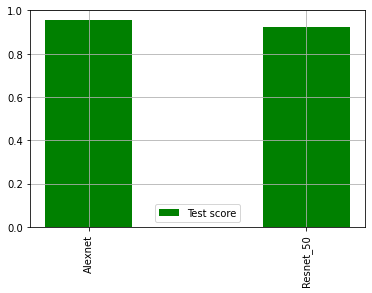

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Alexnet vs CNN**

In [ ]:
s1 = [Alexnet,CNN]
s2 = ['Alexnet','CNN']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

Classifiers  Train score  Test score  No of Missclassification  \
0     Alexnet     0.956140    0.958333                         6   
1         CNN     0.947368    0.930556                        10   

   % of Missclasification  Training time  Prediction time  
0                4.166667       4.227432         0.317703  
1                6.944444      18.318127         0.324168

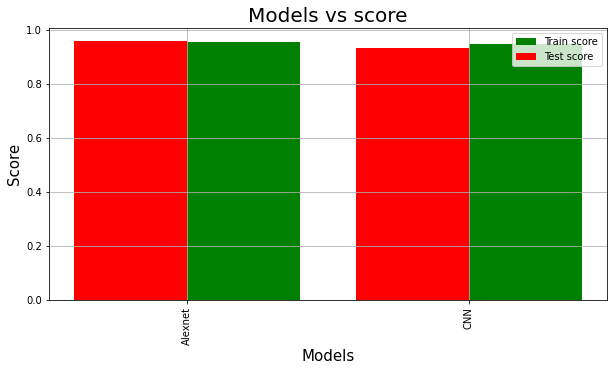

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

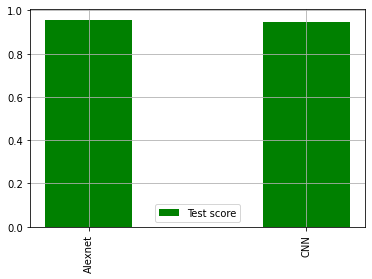

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Alexnet vs Inception**

In [ ]:
s1 = [Alexnet,Inception]
s2 = ['Alexnet','Inception']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

Classifiers  Train score  Test score  No of Missclassification  \
0     Alexnet     0.956140    0.958333                         6   
1   Inception     0.929825    0.937500                         9   

   % of Missclasification  Training time  Prediction time  
0                4.166667       4.227432         0.317703  
1                6.250000      16.980401         1.495573

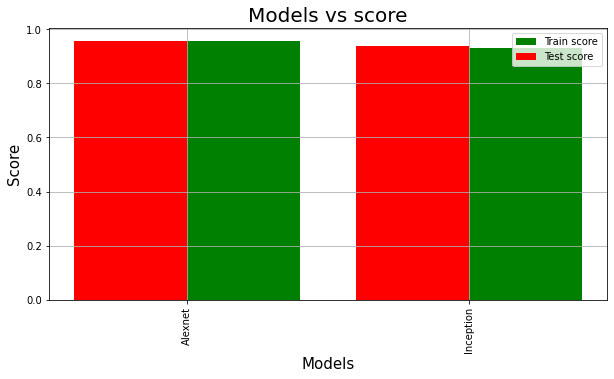

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

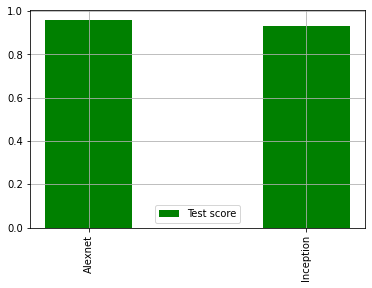

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Alexnet vs VGG**

In [ ]:
s1 = [Alexnet,VGG]
s2 = ['Alexnet','VGG']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

Classifiers  Train score  Test score  No of Missclassification  \
0     Alexnet     0.956140    0.958333                         6   
1         VGG     0.916667    0.909722                        13   

   % of Missclasification  Training time  Prediction time  
0                4.166667       4.227432         0.317703  
1                9.027778      16.980401         0.708684

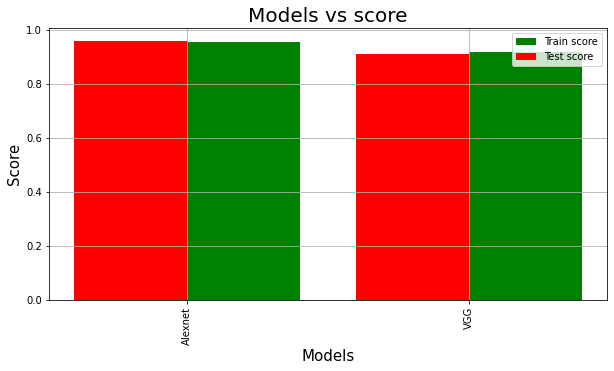

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

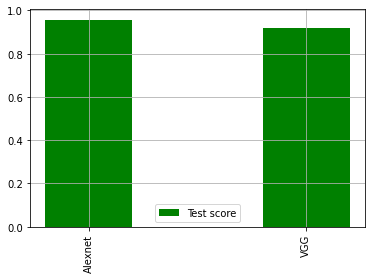

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Final Result - all algo**

In [ ]:
s1 = [Alexnet,CNN,Resnet_50,Inception,VGG]
s2 = ['Alexnet','CNN','Resnet_50','Inception','VGG']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

In [ ]:
result2

Classifiers  Train score  Test score  No of Missclassification  \
0     Alexnet     0.956140    0.958333                         6   
1         CNN     0.947368    0.930556                        10   
2   Resnet_50     0.925439    0.916667                        12   
3   Inception     0.929825    0.937500                         9   
4         VGG     0.916667    0.909722                        13   

   % of Missclasification  Training time  Prediction time  
0                4.166667       4.227432         0.317703  
1                6.944444      18.318127         0.324168  
2                8.333333      16.980401         1.395457  
3                6.250000      16.980401         1.495573  
4                9.027778      16.980401         0.708684

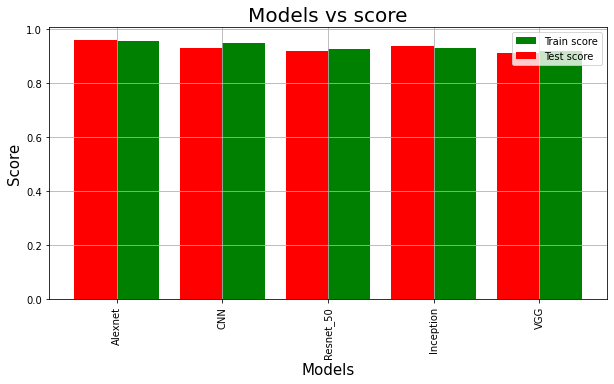

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

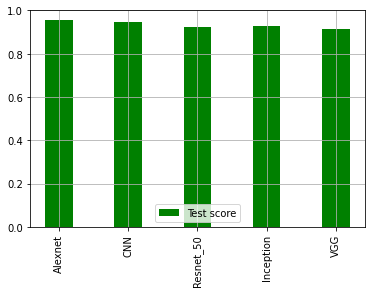

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()